# Gradient Descent

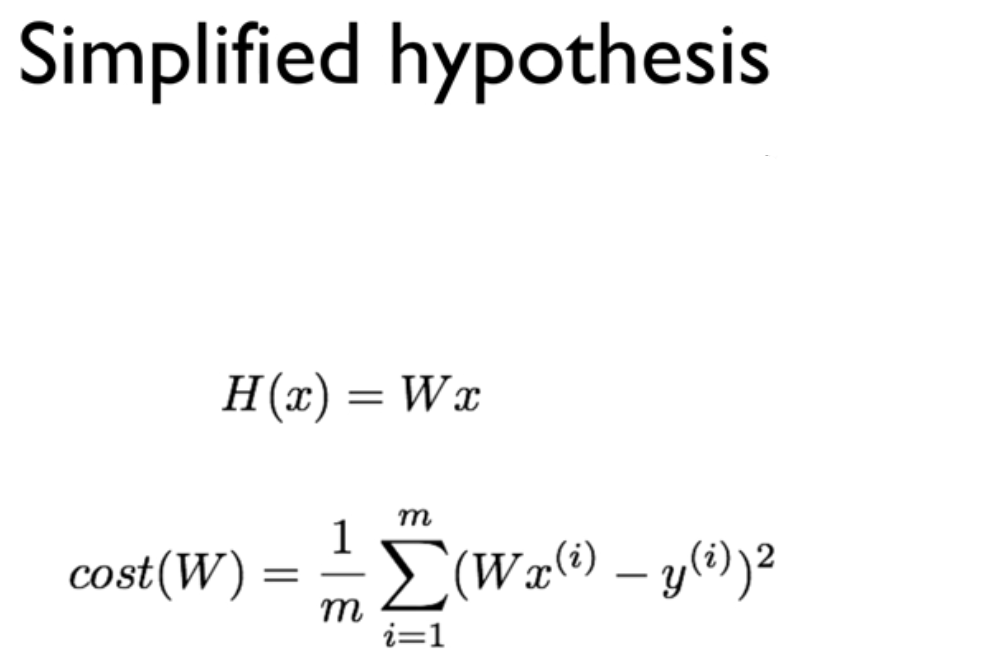

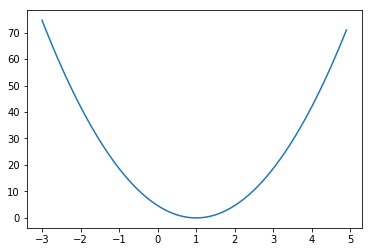

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt

X = [1, 2, 3]
Y = [1, 2, 3]

W = tf.placeholder(tf.float32)  # Wf를 임의로 주기 위해서.
# Our hypothesis for linear model X * W
hypothesis = X * W

# cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))
# Launch the graph in a session
sess = tf.Session()
# Initializes global variable in the graph
sess.run(tf.global_variables_initializer())
# Variables for plotting cost function
W_val = []
cost_val = []
for i in range(-30, 50):  # -3 ~ 5
    feed_W = i * 0.1
    curr_cost, curr_W = sess.run([cost, W], feed_dict={W: feed_W})
    W_val.append(curr_W)
    cost_val.append(curr_cost)
    
    
# Show the cost function
plt.plot(W_val, cost_val)
plt.show()

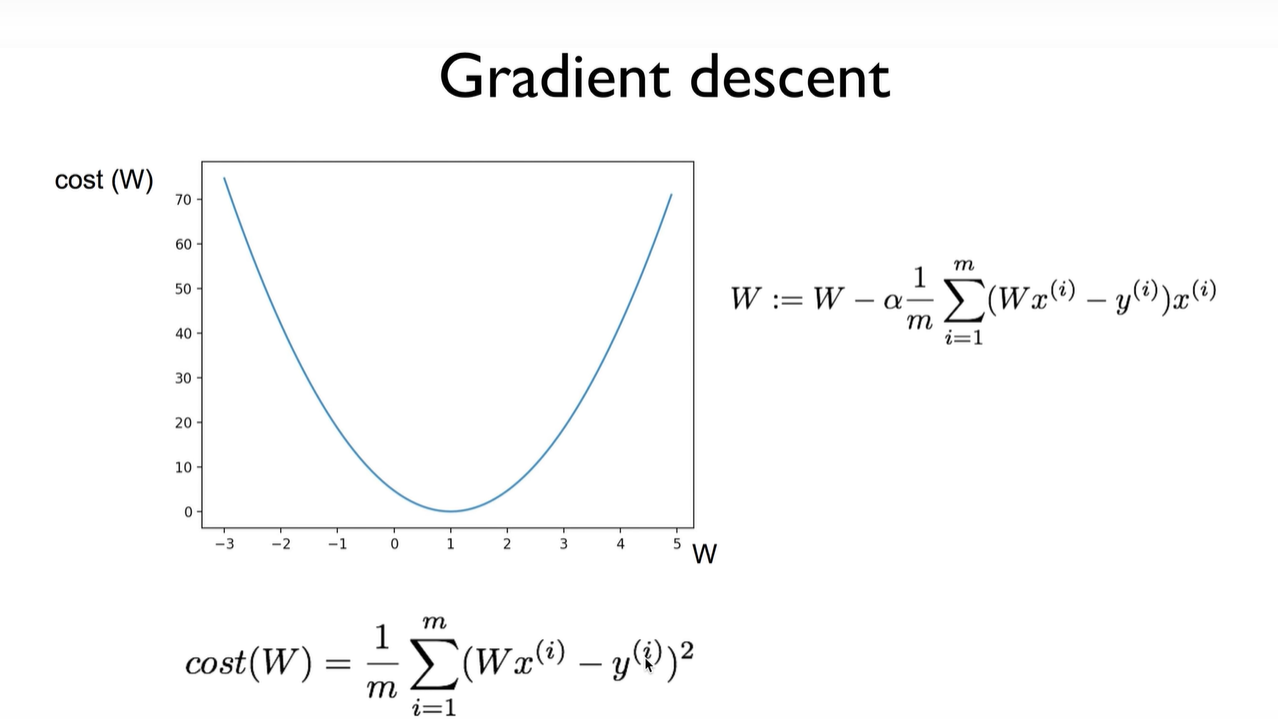

In [ ]:
# Minimize: Gradient Descent using derivative: 
# W -= learning_rate * derivative
learning_rate = 0.1
gradient = tf.reduce_mean((W*X - Y) * X)
descent = W - learning_rate * gradient
# = 이 안되기 때문에, tensor W에 assign하는 함수 사용.
update = W.assign(descent)  

아래는 전체 코드. 수동으로 경사하강법을 구현했음.

In [4]:
import tensorflow as tf
x_data = [1, 2, 3]
y_data = [1, 2, 3]

W = tf.Variable(tf.random_normal([1]), name='weight')
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

# Out hypothesis for linear model X * W
hypothesis = X * W

# cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# Minimize: Gradient Descent using derivative: W -= learning_rate * derivative
learning_rate = 0.1
gradient = tf.reduce_mean((W * X - Y) * X)
descent = W - learning_rate * gradient
update = W.assign(descent)

# Launch the graph in a session
sess = tf.Session()
# Initializes global variables in the graph
sess.run(tf.global_variables_initializer())
for step in range(21):
    sess.run(update, feed_dict={X: x_data, Y: y_data})
    print(step, sess.run(cost, feed_dict={X: x_data, Y: y_data}), sess.run(W))

0 5.1217093 [-0.04762071]
1 1.4568418 [0.44126895]
2 0.41439041 [0.70201015]
3 0.117871046 [0.8410721]
4 0.033527758 [0.91523844]
5 0.009536809 [0.9547938]
6 0.002712693 [0.97589004]
7 0.000771607 [0.9871414]
8 0.00021947986 [0.99314207]
9 6.243014e-05 [0.9963424]
10 1.7757167e-05 [0.9980493]
11 5.050514e-06 [0.99895966]
12 1.4367891e-06 [0.99944514]
13 4.087361e-07 [0.99970406]
14 1.1625267e-07 [0.99984217]
15 3.3054942e-08 [0.99991584]
16 9.405981e-09 [0.9999551]
17 2.6850036e-09 [0.99997604]
18 7.5623063e-10 [0.99998724]
19 2.1708975e-10 [0.9999932]
20 6.2126304e-11 [0.99999636]


TensorFlow에 내장되어 있는 함수 사용.  
  
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)  
train = optimizer.minimize(cost)

In [5]:
import tensorflow as tf

# tf graph input
X = [1, 2, 3]
Y = [1, 2, 3]

# Set wrong model weights
W = tf.Variable(5.0)
# Linear model
hypothesis = X * W
# cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))
# Minimize: Gradient Descent Magic
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
train = optimizer.minimize(cost)

# Launch the graph in a session
sess = tf.Session()
# Initializes global variables in the graph
sess.run(tf.global_variables_initializer())

for step in range(100):
    print(step, sess.run(W))
    sess.run(train)

0 5.0
1 1.2666664
2 1.0177778
3 1.0011852
4 1.000079
5 1.0000052
6 1.0000004
7 1.0
8 1.0
9 1.0
10 1.0
11 1.0
12 1.0
13 1.0
14 1.0
15 1.0
16 1.0
17 1.0
18 1.0
19 1.0
20 1.0
21 1.0
22 1.0
23 1.0
24 1.0
25 1.0
26 1.0
27 1.0
28 1.0
29 1.0
30 1.0
31 1.0
32 1.0
33 1.0
34 1.0
35 1.0
36 1.0
37 1.0
38 1.0
39 1.0
40 1.0
41 1.0
42 1.0
43 1.0
44 1.0
45 1.0
46 1.0
47 1.0
48 1.0
49 1.0
50 1.0
51 1.0
52 1.0
53 1.0
54 1.0
55 1.0
56 1.0
57 1.0
58 1.0
59 1.0
60 1.0
61 1.0
62 1.0
63 1.0
64 1.0
65 1.0
66 1.0
67 1.0
68 1.0
69 1.0
70 1.0
71 1.0
72 1.0
73 1.0
74 1.0
75 1.0
76 1.0
77 1.0
78 1.0
79 1.0
80 1.0
81 1.0
82 1.0
83 1.0
84 1.0
85 1.0
86 1.0
87 1.0
88 1.0
89 1.0
90 1.0
91 1.0
92 1.0
93 1.0
94 1.0
95 1.0
96 1.0
97 1.0
98 1.0
99 1.0


## Optional: compute_gradient and apply_gradient

In [16]:
import tensorflow as tf

# tf graph input
X = [1, 2, 3]
Y = [1, 2, 3]

# Set wrong model weights
W = tf.Variable(5.)
# Linear model
hypothesis = X * W
# Manual gradient
gradient = tf.reduce_mean((W * X - Y) * X) * 2
# cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))
# Minimize: Gradient Descent Magic
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)


# 바로 minimize 하는 것이 아니라, gradient를 계산하라고 함.
# 여기서 gradient에서 조금 수정이 가능함.
# Get gradients
gvs = optimizer.compute_gradients(cost, [W])
# Apply gradients
apply_gradients = optimizer.apply_gradients(gvs)

# Lauch the graph in a session
sess = tf.Session()
# Initializes global variables in the graph
sess.run(tf.global_variables_initializer())

for step in range(100):
    print(step, sess.run([gradient, W, gvs]))
    sess.run(apply_gradients)

0 [37.333332, 5.0, [(37.333336, 5.0)]]
1 [2.4888866, 1.2666664, [(2.4888866, 1.2666664)]]
2 [0.1659259, 1.0177778, [(0.1659259, 1.0177778)]]
3 [0.011061668, 1.0011852, [(0.011061668, 1.0011852)]]
4 [0.00073742867, 1.000079, [(0.00073742867, 1.000079)]]
5 [4.895528e-05, 1.0000052, [(4.8955284e-05, 1.0000052)]]
6 [3.0994415e-06, 1.0000004, [(3.0994415e-06, 1.0000004)]]
7 [0.0, 1.0, [(0.0, 1.0)]]
8 [0.0, 1.0, [(0.0, 1.0)]]
9 [0.0, 1.0, [(0.0, 1.0)]]
10 [0.0, 1.0, [(0.0, 1.0)]]
11 [0.0, 1.0, [(0.0, 1.0)]]
12 [0.0, 1.0, [(0.0, 1.0)]]
13 [0.0, 1.0, [(0.0, 1.0)]]
14 [0.0, 1.0, [(0.0, 1.0)]]
15 [0.0, 1.0, [(0.0, 1.0)]]
16 [0.0, 1.0, [(0.0, 1.0)]]
17 [0.0, 1.0, [(0.0, 1.0)]]
18 [0.0, 1.0, [(0.0, 1.0)]]
19 [0.0, 1.0, [(0.0, 1.0)]]
20 [0.0, 1.0, [(0.0, 1.0)]]
21 [0.0, 1.0, [(0.0, 1.0)]]
22 [0.0, 1.0, [(0.0, 1.0)]]
23 [0.0, 1.0, [(0.0, 1.0)]]
24 [0.0, 1.0, [(0.0, 1.0)]]
25 [0.0, 1.0, [(0.0, 1.0)]]
26 [0.0, 1.0, [(0.0, 1.0)]]
27 [0.0, 1.0, [(0.0, 1.0)]]
28 [0.0, 1.0, [(0.0, 1.0)]]
29 [0.0, 1.0, [(0